In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv('fcc-forum-pageviews.csv')

In [114]:
df['date'] = pd.to_datetime(df['date'])

In [115]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [116]:
df = df.set_index('date')

In [117]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [118]:
df.shape

(1304, 1)

In [119]:
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)

In [120]:
df = df[(df['value'] > lower_bound )& (df['value'] < upper_bound)]

In [121]:
df.shape

(1238, 1)

In [122]:
import matplotlib.pyplot as plt

def draw_line_plot(df):

    plt.figure(figsize=(18, 8))
    plt.plot(df.index, df['value'], color='red', linewidth=1)  


    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
    # Display the plot
    plt.show()




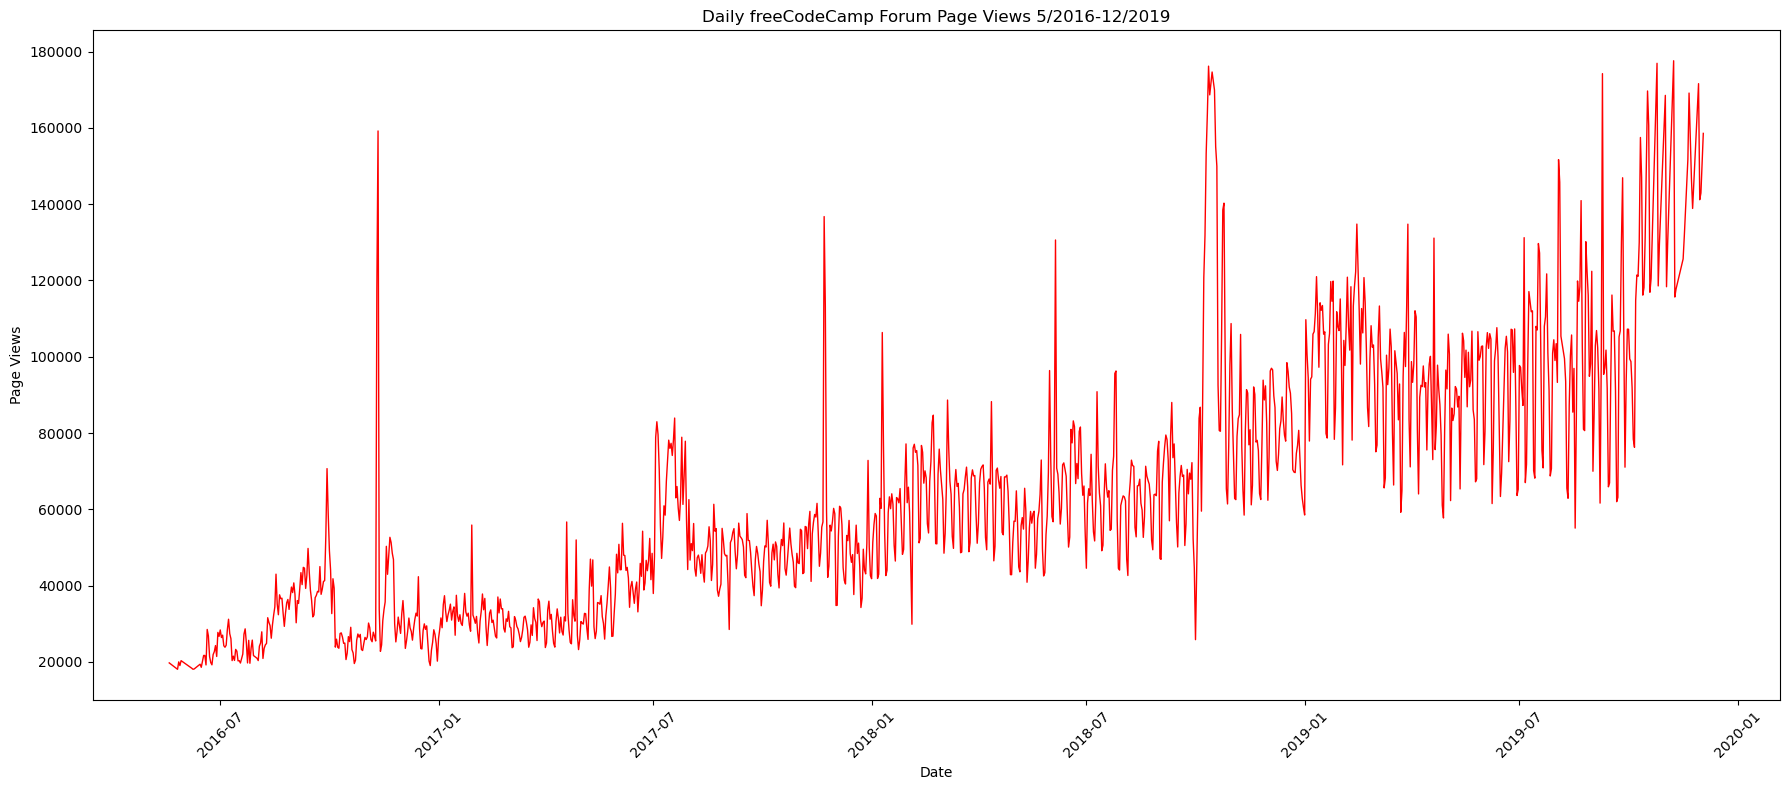

In [123]:
draw_line_plot(df)

In [124]:
import matplotlib.pyplot as plt
import pandas as pd

def draw_bar_plot(df):
    # Resample the data to get the average page views per month
    df['year'] = df.index.year
    df['month'] = df.index.month_name()

    # Group by year and month, then calculate the average page views
    df_grouped = df.groupby(['year', 'month'])['value'].mean().unstack()
    
    df_grouped.head()

    # Plotting
    df_grouped.plot(kind='bar', figsize=(10, 6), legend=True)

    # Set the title and labels
    plt.title('Monthly Average Page Views per Year')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')

    # Set legend title
    plt.legend(title='Months')

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the plot
    plt.show()


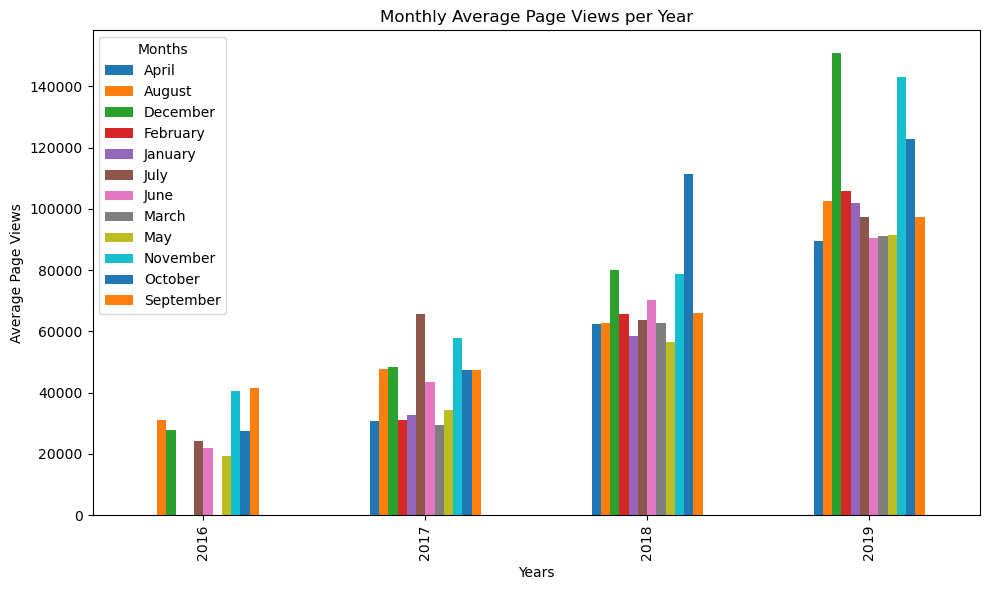

In [125]:
draw_bar_plot(df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def draw_box_plot(df):
    # Prepare the data
    df['Year'] = df.index.year
    df['Month'] = df.index.month_name().str[:3]  # Extract month name and abbreviate to first 3 letters

    # Set up the figure for two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Year-wise Box Plot (Trend)
    sns.boxplot(x='Year', y='value', data=df, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise Box Plot (Seasonality)
    sns.boxplot(x='Month', y='value', data=df, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the plots
    plt.show()

# Assuming df is already loaded and pre-processed to remove outliers
# draw_box_plot(df)
